In [327]:
import cv2
import wget
from color_util import *
from color_cluster import* 
from color_pop_util import *
from skimage.color import deltaE_cie76,lab2rgb
from skimage import io
import numpy as np
import pandas as pd
import time

In [300]:
hsl_cat=np.zeros((6,5,5))

In [301]:
hue=[[330,30],[30,90],[90,150],[150,210],[210,270],[270,330]]
satuation=[[0,20],[20,40],[40,60],[60,80],[80,100]]
lightness=[[0,20],[20,40],[40,60],[60,80],[80,100]]

hue_value=[0,60,120,180,240,300]
satuation_value=[10,30,50,70,90]
lightness_value=[10,30,50,70,90]

In [133]:
image=cv2.imread("../marcc/scraping_image_project/crop_image/21395700.jpg")

In [328]:

from colour import hsl2rgb
from colour import Color

In [329]:
def rgb2hsl(pix):
    pix=np.asarray(pix)/255.
    pixcolor=Color(rgb=pix)
    hsl=pixcolor.hsl
    color_hsl=np.zeros(3)
    color_hsl[0]=hsl[0]*360
    color_hsl[1]=hsl[1]*100
    color_hsl[2]=hsl[2]*100
    return color_hsl

In [134]:
# after prepare image
image=prepare_image(image).astype('uint8')

hsl_cat=np.zeros((6,5,5))

for i in range(image.shape[0]):
    pix_hsl=rgb2hsl(image[i])
    for i in range(1,6):
        if pix_hsl[0]>=hue[i][0] and pix_hsl[0]<hue[i][1]:
            pix_h=i
    if pix_hsl[0]>=330 or pix_hsl[1]<30:
            pix_h=0
    for i in range(5):
        if pix_hsl[1]>=satuation[i][0] and pix_hsl[1]<satuation[i][1]:
            pix_s=i
        if pix_hsl[2]>=lightness[i][0] and pix_hsl[2]<lightness[i][1]:
            pix_l=i
    hsl_cat[pix_h,pix_s,pix_l]+=1



In [143]:
image[12284//2]

array([80, 70, 61], dtype=uint8)

In [139]:
np.where(hsl_cat==1.0730e+03)

(array([0]), array([0]), array([2]))

In [67]:
order=np.argsort(hsl_cat.reshape(150))[::-1]
rank_index=[]
for o in order:
    i1=o//25
    i2=(o%25)//5
    i3=(o%25)%5
    rank_index.append([i1,i2,i3])

In [71]:
hsl_cat[3, 2, 2]

0.0

In [74]:
#rank_index
image

array([[121,  65, 125],
       [160, 102, 165],
       [136,  76, 141],
       ...,
       [144, 136, 137],
       [182, 173, 171],
       [179, 172, 169]], dtype=uint8)

In [76]:
Color(rgb=image[3]/255)

<Color #b174b6>

In [77]:
image[3]

array([177, 116, 182], dtype=uint8)

In [81]:
hsl2rgb?


In [345]:
color_hsl_df=pd.read_csv("../marccc/scraping_image_project/image_pop_color_hsl/pop_color_0.csv")
color_hsl_df.drop(columns="Unnamed: 0",inplace=True)

In [346]:
color_hsl_df

,project_id,time,0,1,2,3,4,5,6,7,...,140,141,142,143,144,145,146,147,148,149
0,21352836,2018/03/12,466.0,2237.0,659.0,118.0,9.0,12.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3990231,2010/05/12,0.0,39.0,2599.0,3614.0,0.0,55.0,114.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8802471,2012/08/22,0.0,73.0,247.0,28.0,0.0,17.0,1513.0,7261.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21395700,2018/03/19,277.0,1650.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4293173,2010/07/25,0.0,4.0,54.0,20.0,1.0,0.0,2.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [375]:
#color_count=(color_hsl_df.drop(columns=['project_id','time'])).iloc[2]
#color_count=np.asarray(frequency)
color_count=np.arange(150)
for i in range(150):
    color_count[i]=frequency[i]

In [376]:
color_order=np.argsort(color_count)[::-1]
color_rank_rgb=[]
for i in color_order:
    i1,i2,i3=oneD_to_3D_index(i)
    color_hsl=np.asarray([hue_value[i1]/360.,satuation_value[i2]/100.,lightness_value[i3]/100.])
    color_rgb=np.asarray(hsl2rgb(color_hsl))
    #print(color_rgb*255)
    #blue=color_rgb[0]
    #color_rgb[0]=color_rgb[2]
    #color_rgb[2]=blue
    color_rank_rgb.append(color_rgb)
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


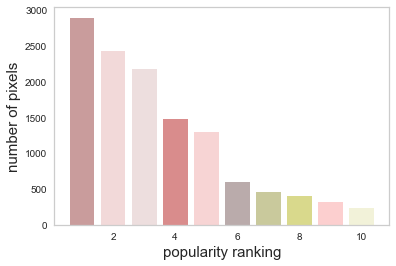

In [380]:
for i in range(10):
    plt.bar([i+1],[color_count[color_order[i]]],color=color_rank_rgb[i])
plt.xlabel("popularity ranking",fontsize=15)
plt.ylabel("number of pixels",fontsize=15)
plt.grid("false")

In [280]:
#plt.bar([i],[color_count[color_order[i]]],color=np.array([165.75 , 89.25 , 89.25])/255.)

<BarContainer object of 1 artists>

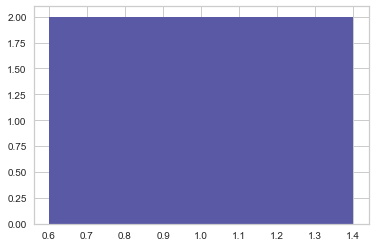

In [282]:
plt.bar([1],[2],color=np.array([89.25 , 89.25, 165.75])/255.)

In [215]:
hsl2rgb((0,0.5,0.5))

(0.75, 0.25, 0.25)

In [216]:
rgb2hsl((255,100,100))

array([  0.        , 100.        ,  69.60784314])

In [370]:
x=cv2.imread("/Users/yajinghuang/Desktop/ripple.png")
#x=prepare_image(x)
#

In [242]:
prepare_image(flip_rgb(x))[x.shape[0]//2]

array([136,  75,  74], dtype=uint8)

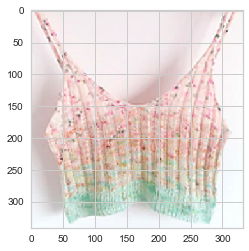

In [371]:
plt.imshow(flip_rgb(x))

In [372]:
image_pop_color(flip_rgb(x),8802471)

time 0.6367249488830566


{2: 21,
 11: 71,
 16: 489,
 29: 203,
 35: 7,
 48: 4,
 52: 16,
 79: 21,
 93: 3,
 97: 2,
 104: 3,
 146: 1,
 157: 727,
 172: 1,
 184: 1,
 186: 8,
 225: 398,
 234: 1,
 273: 27,
 280: 6,
 286: 86,
 302: 2058,
 373: 1,
 378: 118,
 387: 4,
 389: 793,
 397: 41,
 401: 1,
 414: 137,
 436: 2,
 437: 18,
 441: 22,
 455: 525,
 465: 3478,
 491: 31,
 521: 4,
 525: 141,
 527: 2,
 533: 16,
 537: 3,
 541: 140,
 550: 3,
 556: 1,
 559: 571,
 581: 8,
 591: 7,
 601: 1,
 624: 6,
 633: 8,
 669: 1,
 700: 18,
 704: 6,
 711: 29,
 719: 12,
 721: 102,
 732: 47,
 735: 1,
 801: 5,
 838: 1530,
 853: 558,
 864: 2,
 875: 118,
 901: 358,
 911: 3,
 917: 23,
 923: 2,
 'project_id': 8802471}

In [256]:
color=pd.read_csv('rgb.txt')

In [325]:
color.iloc[86]

colorname#hexcode    charcoal grey\t#3c4142\t
Name: 86, dtype: object

In [269]:
color_rank_rgb[0]

array([0.35, 0.35, 0.65])

In [373]:
#image=cv2.imread("/Users/yajinghuang/Downloads/21395700.jpg")
hue=[[330,30],[30,90],[90,150],[150,210],[210,270],[270,330]]
satuation=[[0,20],[20,40],[40,60],[60,80],[80,100]]
lightness=[[0,20],[20,40],[40,60],[60,80],[80,100]]
image=flip_rgb(x)
hsl_cat=np.zeros((6,5,5))
image=(prepare_image(image).astype('uint8'))
red=0
blue=0
for i in range(image.shape[0]):
    pix_hsl=rgb2hsl(image[i])
    if image[i][0]>image[i][2]:
        red+=1
    else: blue+=1
    #print(image[i],pix_hsl)
    for i in range(1,6):
        if pix_hsl[0]>=hue[i][0] and pix_hsl[0]<hue[i][1]:
            pix_h=i
    if pix_hsl[0]>=330 or pix_hsl[1]<30:
            pix_h=0
    for i in range(5):
        if pix_hsl[1]>=satuation[i][0] and pix_hsl[1]<satuation[i][1]:
            pix_s=i
        if pix_hsl[2]>=lightness[i][0] and pix_hsl[2]<lightness[i][1]:
            pix_l=i
    hsl_cat[pix_h,pix_s,pix_l]+=1
    #print([pix_h,pix_s,pix_l])
color_cat_flat=hsl_cat.reshape(150)
frequency={}
for i in range(150):
    frequency[i]=color_cat_flat[i]

In [374]:
#frequency

In [342]:
blue

3751

In [276]:
o=7
i1=o//25
i2=(o%25)//5
i3=(o%25)%5
print(i1,i2,i3)

0 1 2


In [331]:
rgb2hsl((60,65,66))

array([190.        ,   4.76190476,  24.70588235])